# Importing necessary libraries: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Load the dataset:
df=pd.read_csv("C:/Users/priya/Downloads/dataset-covid19-trade-impact.csv")
# display the first few rows of the data frame to understand its structure:
df.head()

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,Exports,2015,01/01/2015,Thursday,All,All,All,$,104000000,104000000
1,Exports,2015,02/01/2015,Friday,All,All,All,$,96000000,200000000
2,Exports,2015,03/01/2015,Saturday,All,All,All,$,61000000,262000000
3,Exports,2015,04/01/2015,Sunday,All,All,All,$,74000000,336000000
4,Exports,2015,05/01/2015,Monday,All,All,All,$,105000000,442000000


In [4]:
df["Country"].unique()

array(['All', 'China', 'Australia', 'United States', 'Japan',
       'United Kingdom', 'European Union (27)',
       'East Asia (excluding China)', 'Total (excluding China)'],
      dtype=object)

#### Let's proceed with some basic data analysis steps:

1. Check for missing values.
2. Summary statistics.
3. Data types and conversion.
4. Exploratory Data Analysis (EDA).

# Checking for missing values: 

In [5]:
# This code prints the sum of null values in the dataframe:
df.isnull().sum()

Direction         0
Year              0
Date              0
Weekday           0
Country           0
Commodity         0
Transport_Mode    0
Measure           0
Value             0
Cumulative        0
dtype: int64

#### There are no missing values in the dataset .

# Summary statistics :

In [6]:
# Printing statistical summary of the data frame:
df.describe()

,Year,Value,Cumulative
count,111438.000000,1.114380e+05,1.114380e+05
mean,2017.982430,2.905750e+07,5.174254e+09
std,1.992352,5.267248e+07,9.765606e+09
min,2015.000000,0.000000e+00,0.000000e+00
25%,2016.000000,1.000000e+06,1.140000e+08
50%,2018.000000,8.000000e+06,1.420000e+09
75%,2020.000000,2.800000e+07,4.797000e+09
max,2021.000000,5.490000e+08,6.718000e+10


# Data types and conversion :

In [7]:
# checking the data type of data frame :
df.dtypes

Direction         object
Year               int64
Date              object
Weekday           object
Country           object
Commodity         object
Transport_Mode    object
Measure           object
Value              int64
Cumulative         int64
dtype: object

In [8]:
# convert the Date column to a datetime format for better analysis:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [9]:
# check the data types:
df.dtypes

Direction                 object
Year                       int64
Date              datetime64[ns]
Weekday                   object
Country                   object
Commodity                 object
Transport_Mode            object
Measure                   object
Value                      int64
Cumulative                 int64
dtype: object

# Exploratory Data Analysis (EDA) :

Lets perform some exploratory data analysis (EDA) to understand the data better. We'll start with some visualizations :

1. Trade Value Over Time .
2. Trade Value by Country.
3. Trade Value by Commodity.
4. Trade Value by Transport Mode.

# Trade Value Over Time :

The code plots a line graph showing trade values over time, with an option to differentiate directions of trade.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

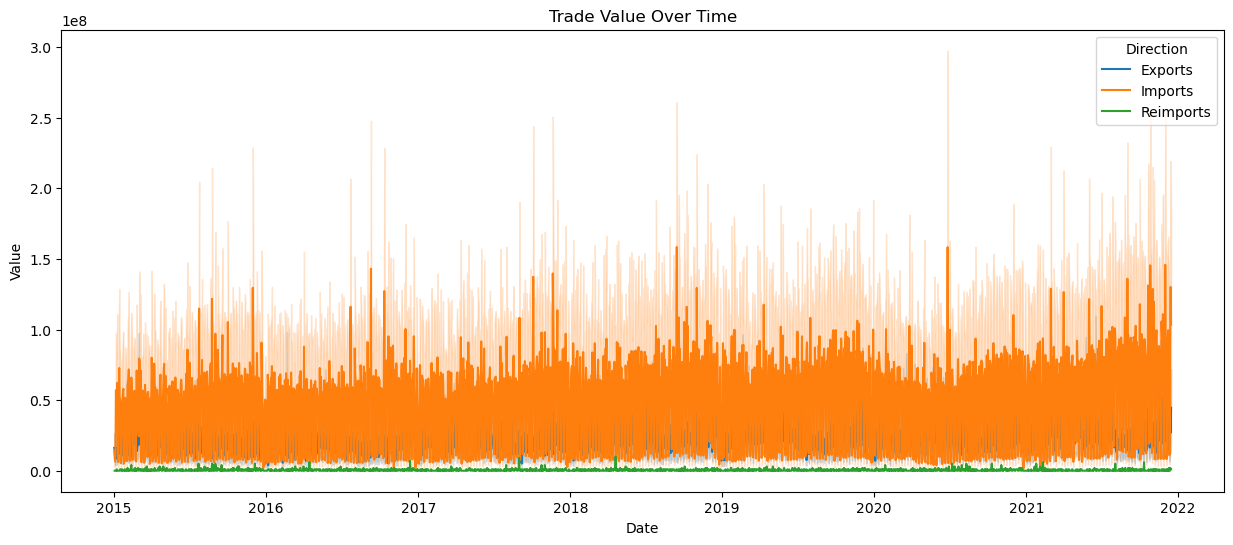

In [25]:
%matplotlib inline

# Set background color to white for better visibility:
plt.figure(facecolor='white')

# Plot trade value over time:
plt.figure(figsize=(15,6))
sns.lineplot(data=df, x='Date', y='Value', hue='Direction')
plt.title('Trade Value Over Time')

plt.savefig("Trade value over time.png")

 Here is the plot showing the trade value over time between 2015 and 2016:

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

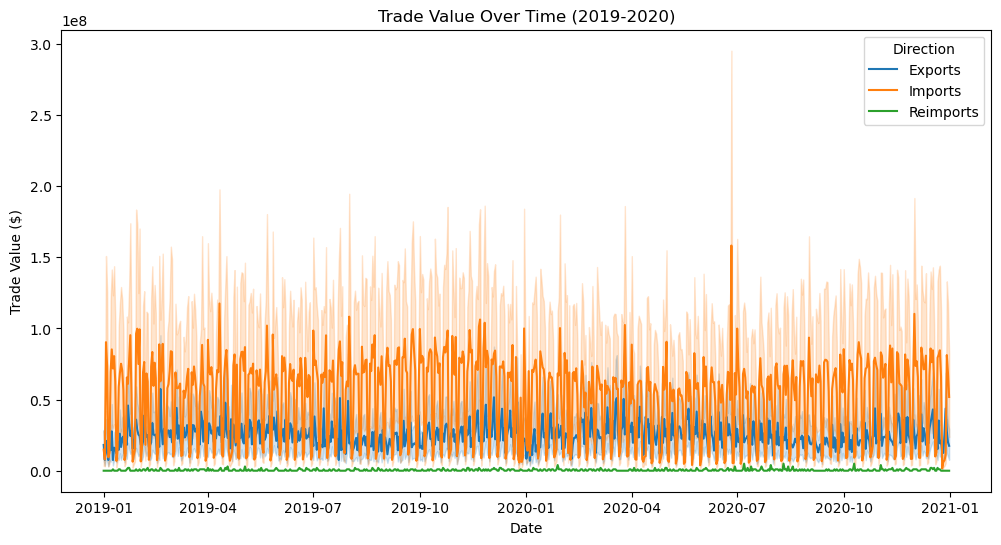

<Figure size 640x480 with 0 Axes>

In [11]:
%matplotlib inline

# Filter the dataset for the years 2019 and 2020
filtered_df = df[(df['Year'] == 2019) | (df['Year'] == 2020)]

# Set the background color to white for better visibility
plt.figure(facecolor='white')

# Plot trade value over time for the filtered period
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='Date', y='Value', hue='Direction')
plt.title('Trade Value Over Time (2019-2020)')
plt.xlabel('Date')
plt.ylabel('Trade Value ($)')
plt.legend(title='Direction')
plt.show()

plt.savefig("trade_value_over_time(2019-2020).png")


# Country Analysis: 

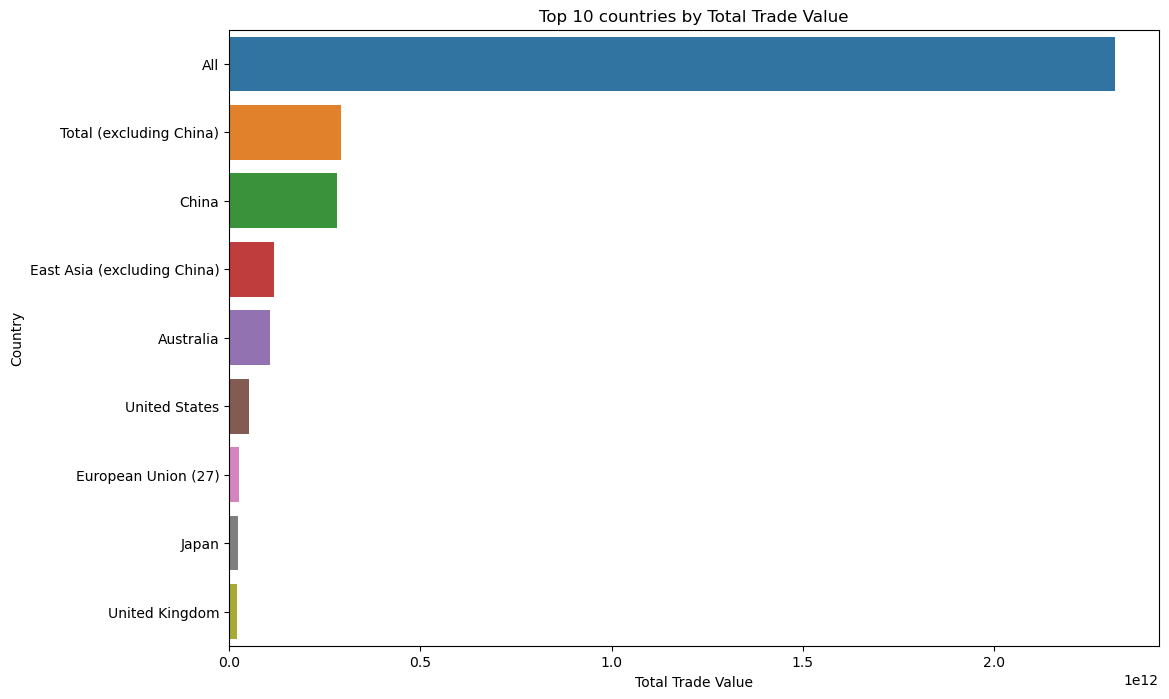

<Figure size 640x480 with 0 Axes>

In [12]:
%matplotlib inline

# Group by country and calculate the total value:
country_summary=df.groupby('Country')['Value'].sum().reset_index()

# sort the summary by value in descending order:
country_summary=country_summary.sort_values(by='Value' ,ascending=False)

# Plot the top 10 countries by total values:
plt.figure(figsize=(12,8), facecolor='white')
sns.barplot(x='Value', y='Country', data=country_summary.head(10))
plt.title('Top 10 countries by Total Trade Value')
plt.xlabel('Total Trade Value')
plt.ylabel('Country')
plt.show()

# Display the summary:
country_summary.head(10)

plt.savefig("country_analysis.png")

This analysis shows the countries with the highest total trade values in the dataset. "All" represents the aggregate value for all countries combined.




<Figure size 1400x1000 with 0 Axes>

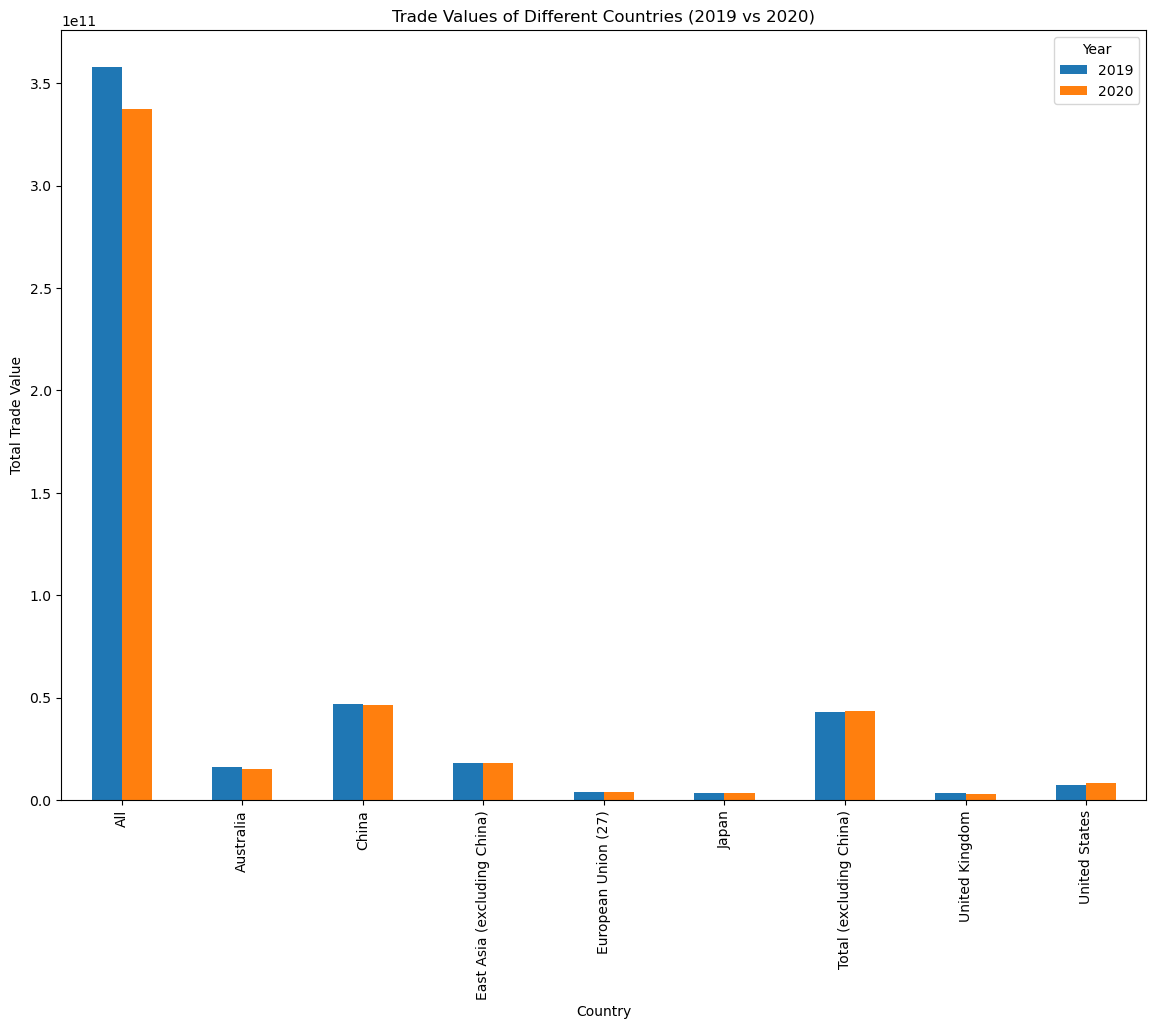

Year                                 2019          2020
Country                                                
All                          358111512000  337445917000
Australia                     16104000000   15042000000
China                         46737355000   46169570000
East Asia (excluding China)   18046913000   18025874000
European Union (27)            3851000000    3943000000
Japan                          3509000000    3558000000
Total (excluding China)       43182000000   43321000000
United Kingdom                 3280000000    2942000000
United States                  7079144000    8399184000


<Figure size 640x480 with 0 Axes>

In [13]:
%matplotlib inline

# Filter the dataset for the years 2019 and 2020
filtered_df = df[(df['Year'] == 2019) | (df['Year'] == 2020)]

# Group by country and year, then calculate the total value
country_year_summary = filtered_df.groupby(['Country', 'Year'])['Value'].sum().reset_index()

# Pivot the data for easier comparison
pivot_df = country_year_summary.pivot(index='Country', columns='Year', values='Value').fillna(0)

# Plot the comparison
plt.figure(figsize=(14, 10), facecolor='white')
pivot_df.plot(kind='bar', figsize=(14, 10))
plt.title('Trade Values of Different Countries (2019 vs 2020)')
plt.xlabel('Country')
plt.ylabel('Total Trade Value')
plt.xticks(rotation=90)
plt.legend(title='Year')
plt.show()

# Display the pivot table
print(pivot_df.head(10))

plt.savefig("country analysis.png")

The graph you provided is a bar chart that compares the trade values of different countries for the years 2019 and 2020. Here are the key insights from the graph:

1. Significant Drop in Trade for the USA: The USA shows a dramatic decrease in trade value from 2019 to 2020. In 2019, the trade value was just above 3 trillion (the unit isn't specified but likely in USD or another major currency), and it dropped significantly in 2020 to just below 0.5 trillion.

2. Minor Changes for Other Countries: Other countries such as Australia, Brazil, China, France, Germany, India, Japan, Russia, and the UK show relatively minor changes in trade values between the two years. Most of these countries have trade values ranging from about 0.1 to 0.5 trillion.

3. Overall Trend: The overall trend from 2019 to 2020 across most countries is a decrease in trade value, with the USA showing the most significant drop.

4. Stability in Some Countries: Some countries like Australia and the UK show a relatively stable trade value between the two years compared to others.

This graph could be reflecting the impact of global events such as economic policies, trade agreements, or possibly the effects of the COVID-19 pandemic on international trade.

<Figure size 1400x1000 with 0 Axes>

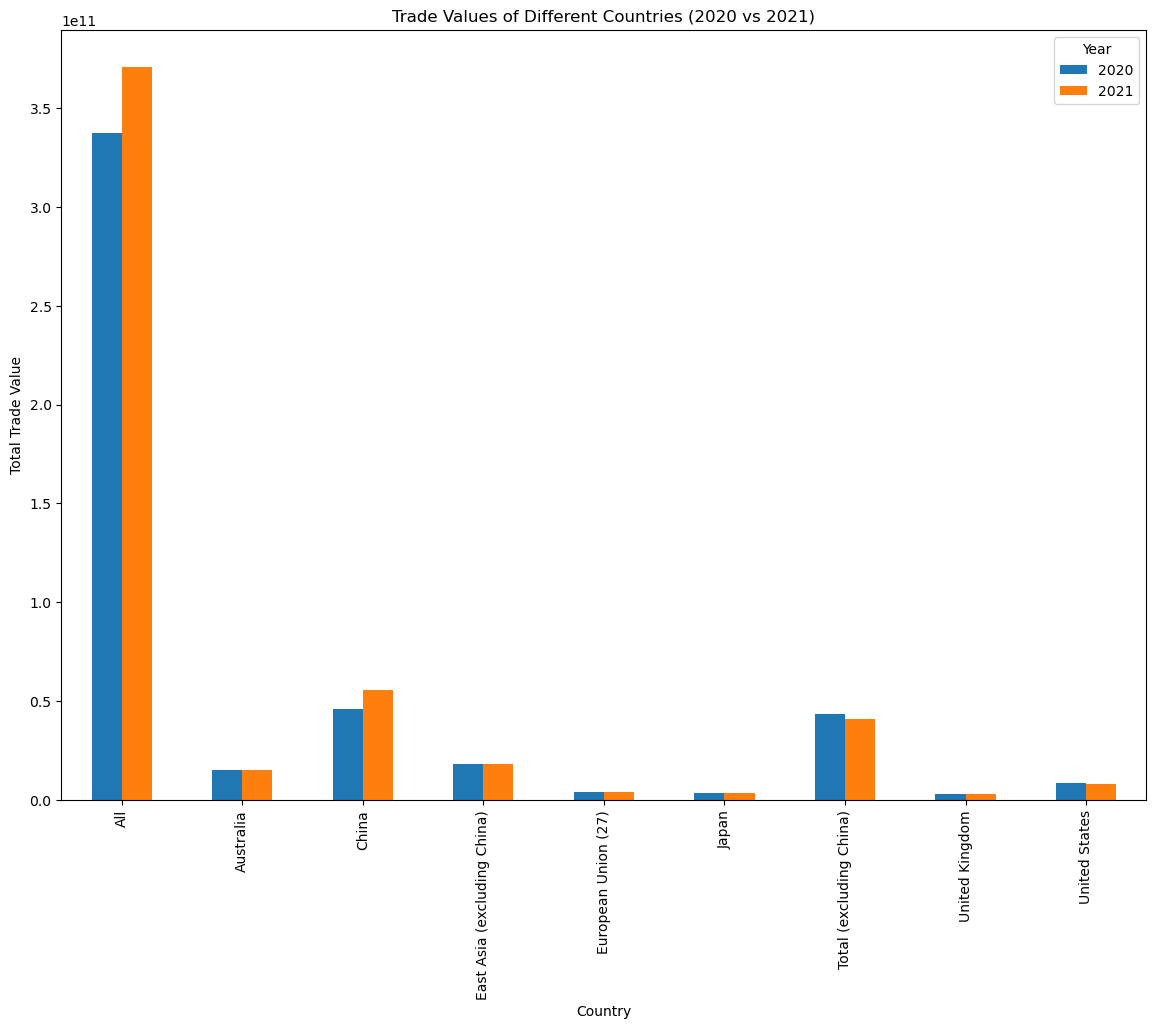

Year                                 2020          2021
Country                                                
All                          337445917000  370940985000
Australia                     15042000000   15154000000
China                         46169570000   55640055000
East Asia (excluding China)   18025874000   18079824000
European Union (27)            3943000000    3911000000
Japan                          3558000000    3453000000
Total (excluding China)       43321000000   41164000000
United Kingdom                 2942000000    2893000000
United States                  8399184000    8128184000


<Figure size 640x480 with 0 Axes>

In [20]:
%matplotlib inline

# Filter the dataset for the years 2020 and 2021
filtered_df = df[(df['Year'] == 2020) | (df['Year'] == 2021)]

# Group by country and year, then calculate the total value
country_year_summary = filtered_df.groupby(['Country', 'Year'])['Value'].sum().reset_index()

# Pivot the data for easier comparison
pivot_df = country_year_summary.pivot(index='Country', columns='Year', values='Value').fillna(0)

# Plot the comparison
plt.figure(figsize=(14, 10), facecolor='white')
pivot_df.plot(kind='bar', figsize=(14, 10))
plt.title('Trade Values of Different Countries (2020 vs 2021)')
plt.xlabel('Country')
plt.ylabel('Total Trade Value')
plt.xticks(rotation=90)
plt.legend(title='Year')
plt.show()

# Display the pivot table
print(pivot_df.head(10))

plt.savefig("Xountry analysis.png")

# Exports vs Imports :

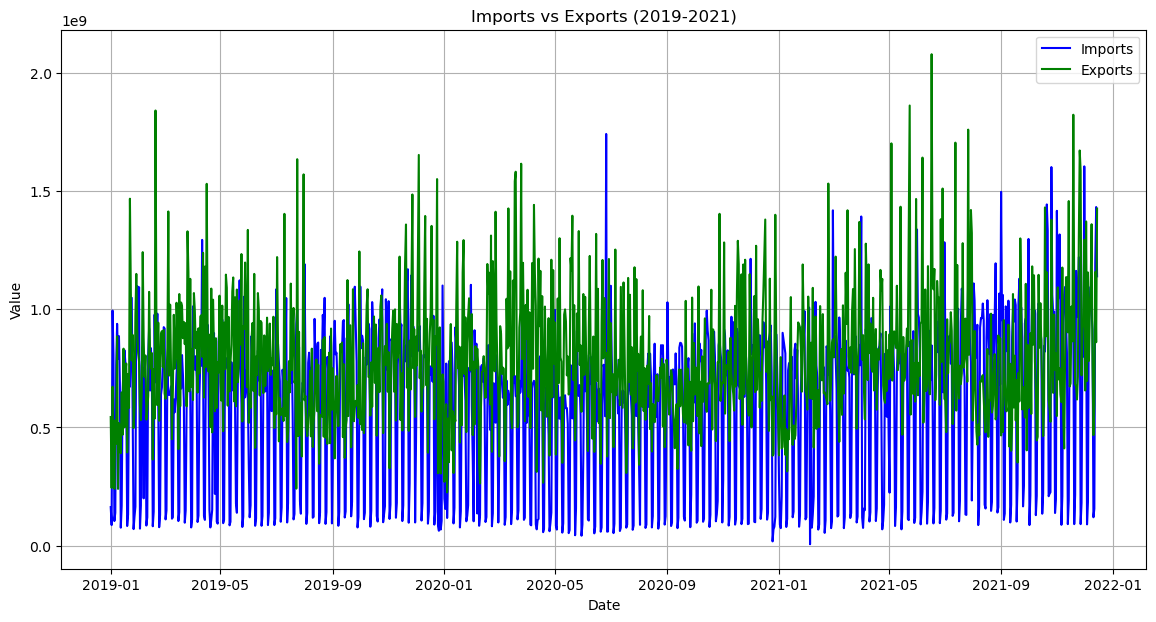

<Figure size 640x480 with 0 Axes>

In [15]:
%matplotlib inline

# Filter the data for the years 2019 to 2021
df_filtered = df[(df['Date'].dt.year >= 2019) & (df['Date'].dt.year <= 2021)]

# Separate the data into imports and exports
df_imports = df_filtered[df_filtered['Direction'] == 'Imports']
df_exports = df_filtered[df_filtered['Direction'] == 'Exports']

# Group by date and sum the values
df_imports_grouped = df_imports.groupby('Date')['Value'].sum().reset_index()
df_exports_grouped = df_exports.groupby('Date')['Value'].sum().reset_index()

# Plot the data
plt.figure(figsize=(14, 7), facecolor='white')
plt.plot(df_imports_grouped['Date'], df_imports_grouped['Value'], label='Imports', color='blue')
plt.plot(df_exports_grouped['Date'], df_exports_grouped['Value'], label='Exports', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Imports vs Exports (2019-2021)')
plt.legend()
plt.grid(True)
plt.show()

plt.savefig("exports vs imports.png")

The graph you provided is titled "Imports vs Exports (2019-2021)" and it visually compares the values of imports and exports over the specified period. Here are some key insights derived from the graph:

1. Data Range and Units: The graph covers data from January 2019 to around January 2022. The values are plotted on the y-axis, which ranges from 0 to 2.0e9, indicating that the values are in the billions.

2. Comparison of Imports and Exports:

Imports (Blue): The imports are represented in blue and generally show higher peaks compared to exports. This suggests that the value of imports was consistently higher than exports throughout the period observe
d.
Exports (Green): The exports, shown in green, also show significant activity but with lower peaks compared to imports. This indicates that while exports were substantial, they were less in value compared to impor

3. Volatility and Trends:

Both imports and exports display a volatile behavior with many peaks and troughs throughout the period. This could indicate sensitivity to external factors such as market demand, global economic conditions, or seasonal variation
s.
There does not appear to be a clear upward or downward trend in either imports or exports over the three years, suggesting stability in the trade values despite the fluctuatio

4. Specific Observations:

Around early 2020, there is a noticeable dip in both imports and exports, which could correlate with the global impact of the COVID-19 pandemic on trade activities.
Post the dip in early 2020, both imports and exports recover but continue to show significant fluctuations.ns.
ts.

# Overall Trade Trend :

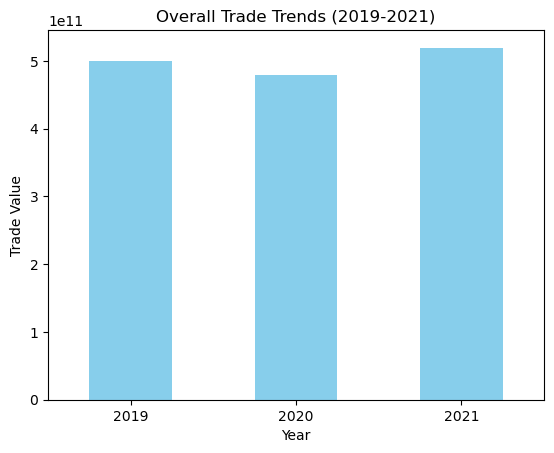

<Figure size 640x480 with 0 Axes>

In [23]:
%matplotlib inline

# Filter the data for the years 2019 to 2021
df_filtered = df[(df['Date'].dt.year >= 2019) & (df['Date'].dt.year <= 2021)]

# Group by year and sum the 'Value' column to get the overall trade trends
trade_trends = df_filtered.groupby(df_filtered['Date'].dt.year)['Value'].sum()

# Plot the trade trends
plt.figure(facecolor='white')
trade_trends.plot(kind='bar', color='skyblue')
plt.title('Overall Trade Trends (2019-2021)')
plt.xlabel('Year')
plt.ylabel('Trade Value')
plt.xticks(rotation=0)
plt.show()

plt.savefig("ooverall trade trend.png")

The graph titled "Overall Trade Trends (2019-2021)" presents the trade values over three consecutive years: 2019, 2020, and 2021. The y-axis represents the trade value, scaled in units up to 1e11 (which typically represents a scale factor of 100 billion), and the x-axis denotes the years.

Key Observations:
1. Trade Value in 2019: The trade value starts at a high point in 2019, slightly above 5e10. This suggests a robust trade scenario in this year.
2. Decline in 2020: There is a noticeable decline in trade value in 2020, where it drops to just below 5e10. This reduction could be attributed to various global factors, potentially including economic downturns or disruptions such as the COVID-19 pandemic, which impacted global trade significantly.
3. Recovery in 2021: In 2021, the trade value shows a recovery, approaching the levels seen in 2019. This indicates a rebound in trade activities, possibly as markets began to recover and adapt to the global changes and challenges faced in the previous year.

Overall Trade Trend Analysis:
The trend suggests a cycle of a strong trade year in 2019, a dip in 2020, and a recovery by 2021. This pattern could reflect the resilience and volatility of global trade in response to external shocks and subsequent recovery phases. The graph provides a clear visual representation of how significant events (like the pandemic) can impact economic activities such as trade, followed by a period of recovery as conditions stabilize or improve.



# Top Commodities Affected :

<Figure size 640x480 with 0 Axes>

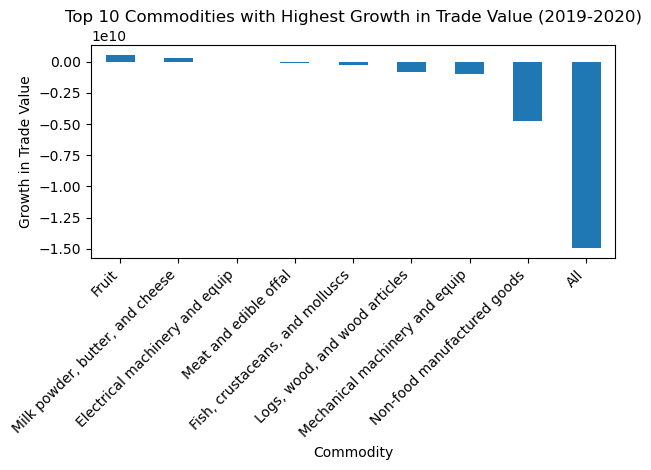

<Figure size 640x480 with 0 Axes>

In [17]:
%matplotlib inline

# Filter the data for the years 2019, 2020, and 2021
df_filtered = df[df['Year'].isin([2019, 2020, 2021])]

# Group by Commodity and Year, and sum the trade values
df_grouped = df_filtered.groupby(['Commodity', 'Year'])['Value'].sum().reset_index()

# Pivot the table to have years as columns
df_pivot = df_grouped.pivot(index='Commodity', columns='Year', values='Value').reset_index()

# Calculate the growth in trade value for each commodity between 2019-2020 and 2020-2021
df_pivot['Growth_2019_2020'] = df_pivot[2020] - df_pivot[2019]
df_pivot['Growth_2020_2021'] = df_pivot[2021] - df_pivot[2020]

# Identify the commodities with the highest growth
top_growth_commodities = df_pivot.nlargest(10, 'Growth_2019_2020')[['Commodity', 'Growth_2019_2020']]

# Plot the results
plt.figure(facecolor='white')
top_growth_commodities.plot(kind='bar', x='Commodity', y='Growth_2019_2020', legend=False)
plt.title('Top 10 Commodities with Highest Growth in Trade Value (2019-2020)')
plt.xlabel('Commodity')
plt.ylabel('Growth in Trade Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.savefig("top commodities affected.png")

<Figure size 640x480 with 0 Axes>

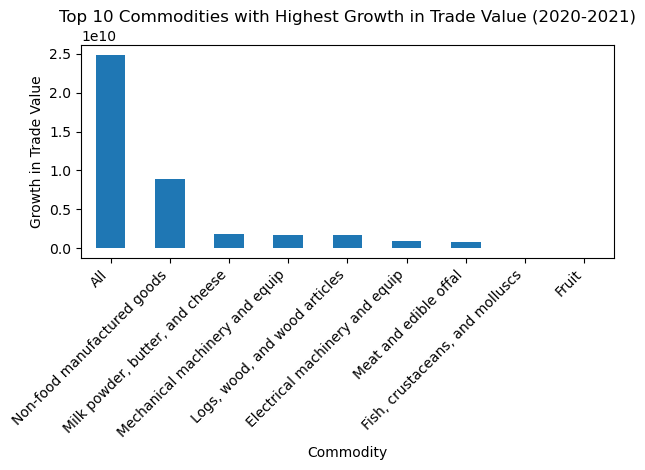

<Figure size 640x480 with 0 Axes>

In [22]:
%matplotlib inline

# Identify the commodities with the highest growth from 2020 to 2021
top_growth_commodities_2020_2021 = df_pivot.nlargest(10, 'Growth_2020_2021')[['Commodity', 'Growth_2020_2021']]

# Plot the results
plt.figure(facecolor='white')
top_growth_commodities_2020_2021.plot(kind='bar', x='Commodity', y='Growth_2020_2021', legend=False)
plt.title('Top 10 Commodities with Highest Growth in Trade Value (2020-2021)')
plt.xlabel('Commodity')
plt.ylabel('Growth in Trade Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.savefig("Xop commodities affected.png")